In [1]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product
%matplotlib inline
import numpy as np
import datetime
from dateutil import relativedelta
import calendar


def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

D:\3kurs1sem\IDEs\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
wine = pd.read_csv(r'd:\DownLoads\monthly-australian-wine-sales.csv', ',', index_col=['month'], parse_dates=['month'],dayfirst=True)

In [3]:
wine.sales = wine.sales * 1000


In [4]:
!pip update statsmodels

ERROR: unknown command "update"



In [5]:
wine.head()

,sales
month,
1980-01-01,15136000
1980-02-01,16733000
1980-03-01,20016000
1980-04-01,17708000
1980-05-01,18019000


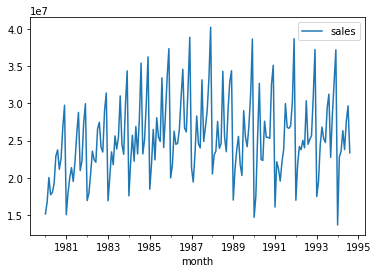

In [6]:
wine.plot()

0.05116115205187588

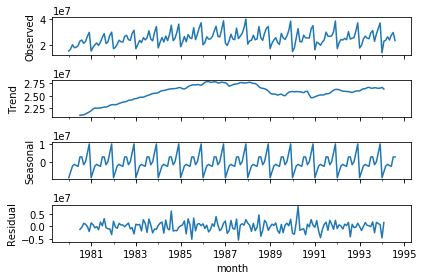

In [7]:
sm.tsa.seasonal_decompose(wine.sales).plot()
sm.tsa.stattools.adfuller(wine.sales)[1]

0.23667531952259896


0.02956504351726415

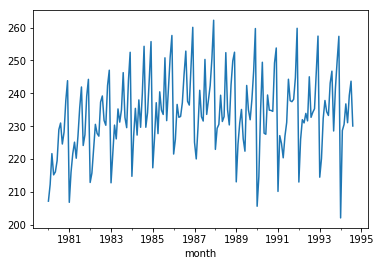

In [8]:
wine['sales_box'] , lmbda = stats.boxcox(wine.sales)
wine.sales_box.plot()
print(lmbda)
sm.tsa.stattools.adfuller(wine.sales_box)[1]

0.12831728326916048

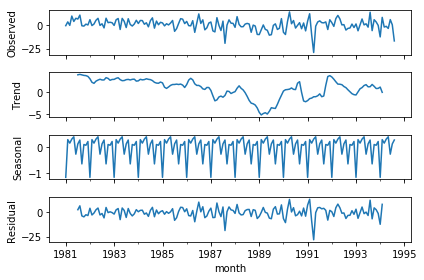

In [9]:
wine['sales_box_diff'] = wine.sales_box - wine.sales_box.shift(12)
sm.tsa.seasonal_decompose(wine.sales_box_diff[12:]).plot()
sm.tsa.stattools.adfuller(wine.sales_box_diff[12:])[1]

2.1237370026647793e-06

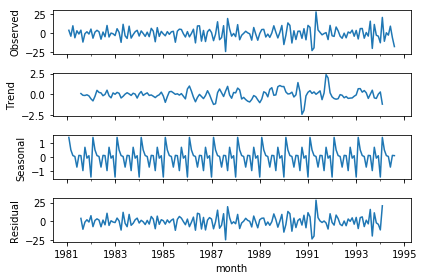

In [10]:
wine['sales_box_diff2'] = wine.sales_box_diff - wine.sales_box_diff.shift(1)
sm.tsa.seasonal_decompose(wine.sales_box_diff2[13:]).plot()
sm.tsa.stattools.adfuller(wine.sales_box_diff2[13:])[1]

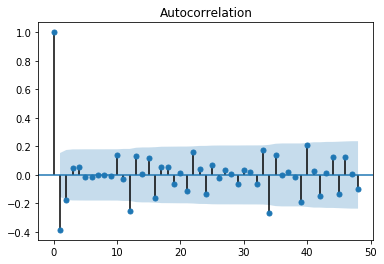

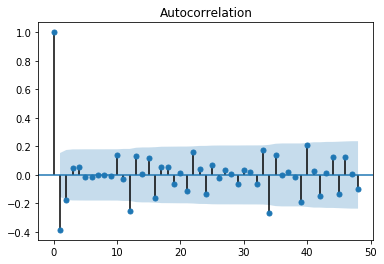

In [11]:
sm.graphics.tsa.plot_acf(wine.sales_box_diff2[13:].values.squeeze(), lags=48)

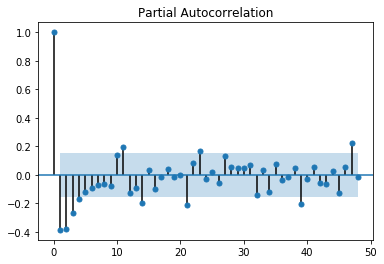

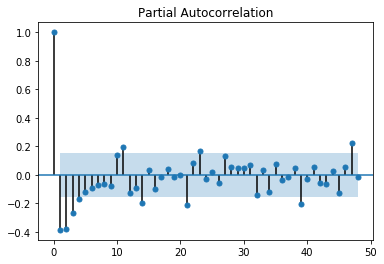

In [12]:
sm.graphics.tsa.plot_pacf(wine.sales_box_diff2[13:].values.squeeze(), lags=48)

In [13]:
ps = range(0,5)
d=1
qs = range(0,3)
Ps = range(0,2)
D = 1
Qs = range(0,2)

In [14]:
parameters = product(ps,qs,Ps,Qs)
parameters_list = list(parameters)
len(parameters_list)

60

In [15]:
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(wine.sales_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')
    

wrong parameters: (0, 0, 0, 0)
wrong parameters: (0, 2, 0, 0)
wrong parameters: (0, 2, 0, 1)
wrong parameters: (0, 2, 1, 0)
wrong parameters: (0, 2, 1, 1)
wrong parameters: (3, 2, 0, 0)
wrong parameters: (3, 2, 0, 1)
wrong parameters: (3, 2, 1, 0)
wrong parameters: (3, 2, 1, 1)
wrong parameters: (4, 2, 0, 0)
wrong parameters: (4, 2, 0, 1)
wrong parameters: (4, 2, 1, 0)
wrong parameters: (4, 2, 1, 1)


In [16]:
!pip install --upgrade pip 
!pip install -U statsmodels

ERROR: To modify pip, please run the following command:
D:\3kurs1sem\IDEs\python.exe -m pip install --upgrade pip
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
D:\3kurs1sem\IDEs\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedWriter name=6>
  return process_handler(cmd, _system_body)
D:\3kurs1sem\IDEs\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
D:\3kurs1sem\IDEs\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)


Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: 'd:\\3kurs1sem\\ides\\lib\\site-packages\\tensorflow-1.10.0.dist-info\\METADATA'

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [17]:
result_table = pd.DataFrame(results)



In [18]:
result_table.colums = ['parameters', 'aic']

D:\3kurs1sem\IDEs\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [19]:
result_table.sort_values(by=result_table.columns[1], ascending=True).head()

,0,1
24,"(2, 1, 0, 1)",1007.801553
26,"(2, 1, 1, 1)",1008.786538
28,"(2, 2, 0, 1)",1009.284267
36,"(3, 1, 0, 1)",1009.723537
6,"(0, 1, 1, 1)",1010.126754


In [20]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          sales_box   No. Observations:                  176
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -498.901
Date:                            Fri, 28 Sep 2018   AIC                           1007.802
Time:                                    15:16:16   BIC                           1023.654
Sample:                                01-01-1980   HQIC                          1014.231
                                     - 08-01-1994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1506      0.085     -1.763      0.078      -0.318       0.017
ar.L2         -0.1990      0.111     -1.800      0.072      -0.416       0.018
ma.L1         -0.8394      0.055    -15.258      0.000      -0.947      -0.732
ma.S.L12      -0.6688      0.052    -12.746      0.000      -0.772      -0.566
sigma2        25.2278      2.144     11.768      0.000      21.026      29.429
===================================================================================
Ljung-Box (Q):                       40.31   Jarque-Bera (JB):                25.57
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

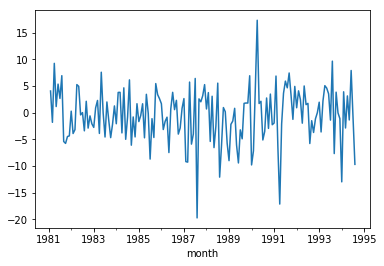

In [21]:
best_model.resid[13:].plot()

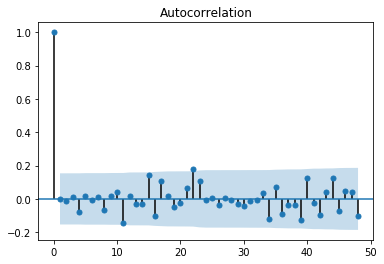

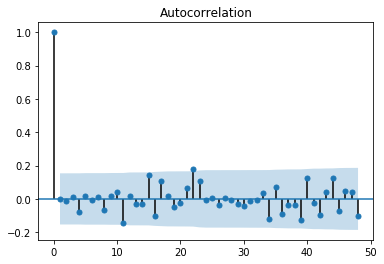

In [22]:
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(),lags=48)

In [23]:
stats.ttest_1samp(best_model.resid[13:],0)[1]


0.257989513515395

In [24]:
sm.tsa.stattools.adfuller(best_model.resid[13:])[1]

1.8444653687073928e-23

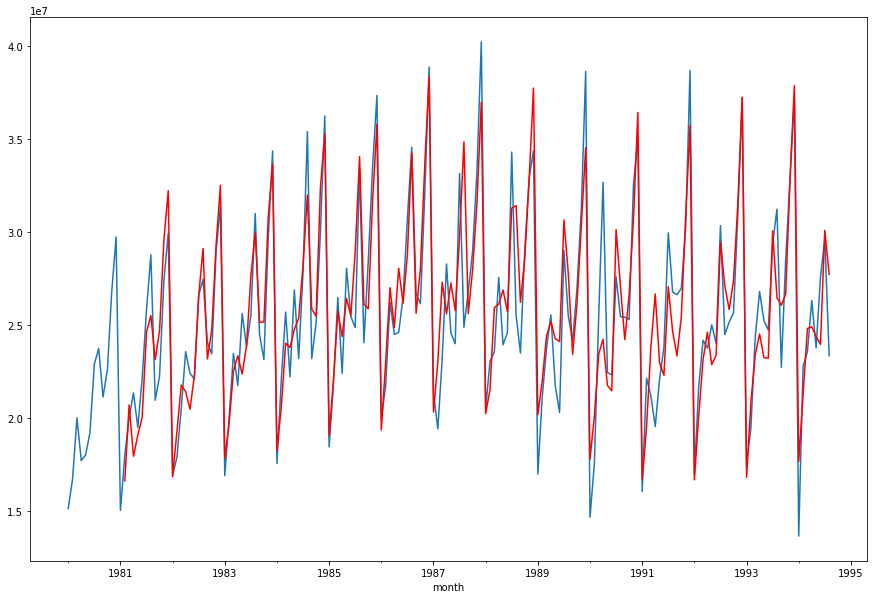

In [25]:
wine['model'] = invboxcox(best_model.fittedvalues,lmbda)
plt.figure(figsize=(15,10))
wine.sales.plot()
wine.model[13:].plot(color='r')


In [26]:
def add_months(sourcedate,months):
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day,calendar.monthrange(year,month)[1])
    return datetime.date(year,month,day)

Text(0,0.5,'Wine sales')

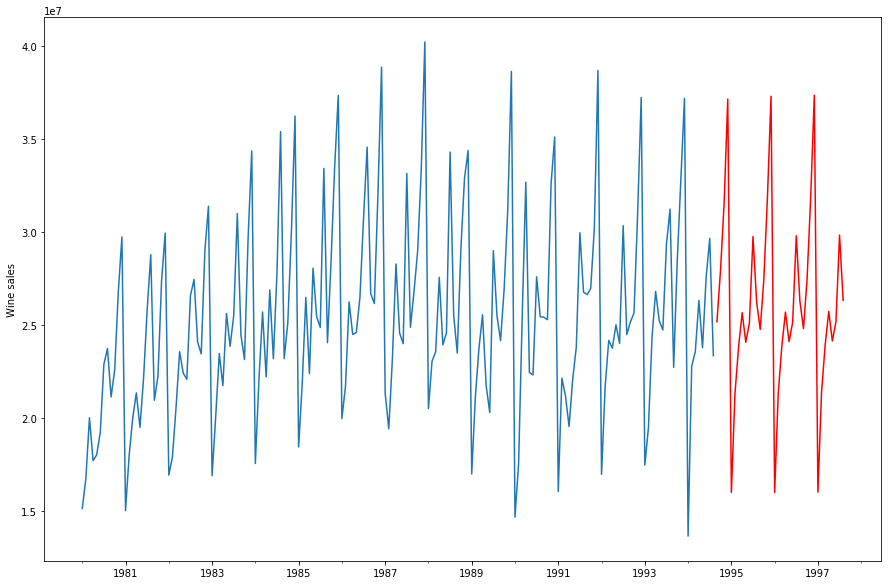

In [27]:
wine2 = wine[['sales']]
wine2.index = pd.to_datetime(wine2.index)
date_list = [add_months(datetime.datetime.strptime("1994-09-01", "%Y-%m-%d"),x) for x in range(0,36)]
future = pd.DataFrame(index=pd.to_datetime(date_list), columns=['sales'])
wine2 = pd.concat([wine2, future])
wine2['forecast'] = invboxcox(best_model.predict(start=176, end=211), lmbda)

plt.figure(figsize=(15,10))
wine2.sales.plot()
wine2.forecast.plot(color='red')
plt.ylabel('Wine sales')


In [28]:
211-176

35

In [29]:
wine2.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1996-11-01', '1996-12-01', '1997-01-01', '1997-02-01',
               '1997-03-01', '1997-04-01', '1997-05-01', '1997-06-01',
               '1997-07-01', '1997-08-01'],
              dtype='datetime64[ns]', length=212, freq=None)